# Covid19 Data Analysis

#### Objective: To find the relation between the spread of Covid19 in a country and its Happiness record. 

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset of corona cases
corona_df = pd.read_csv(r"covid19_Confirmed_dataset.csv", encoding="unicode_escape")
corona_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
corona_df.shape

(266, 104)

In [9]:
#renaming and dropping columns 
corona_df.rename(columns={"Country/Region": "Country"}, inplace=True)
corona_df.drop(["Province/State","Lat","Long"], axis=1, inplace=True)

In [10]:
corona_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [11]:
#aggregating columns by country
corona_agg = corona_df.groupby("Country").sum()
corona_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [12]:
corona_agg.shape

(187, 100)

Text(0.5, 1.0, 'Cases vs Time')

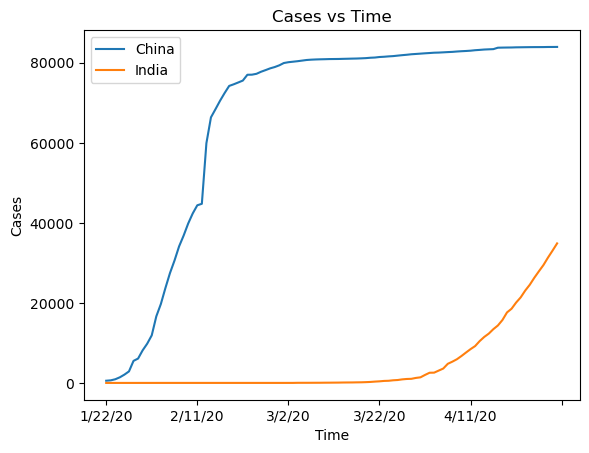

In [13]:
#visualising data related to China and India
corona_agg.loc["China"].plot()
corona_agg.loc["India"].plot()
plt.xlabel("Time")
plt.ylabel("Cases")
plt.legend()
plt.title("Cases vs Time")

Text(0.5, 1.0, 'Cases vs Time')

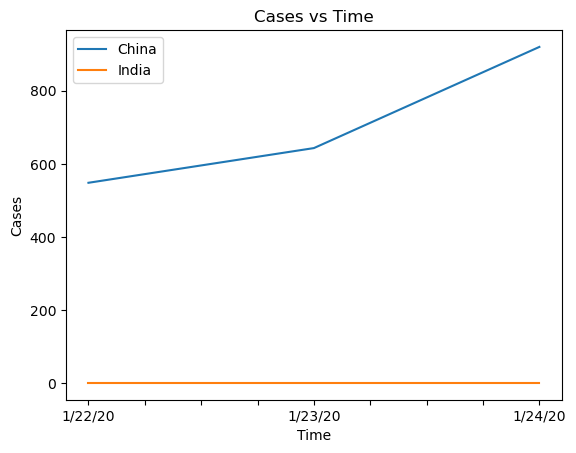

In [14]:
#visualising data for the first few days to find a good measure
corona_agg.loc["China"][:3].plot()
corona_agg.loc["India"][:3].plot()
plt.xlabel("Time")
plt.ylabel("Cases")
plt.legend()
plt.title("Cases vs Time")

Text(0.5, 1.0, 'Derivative vs Time')

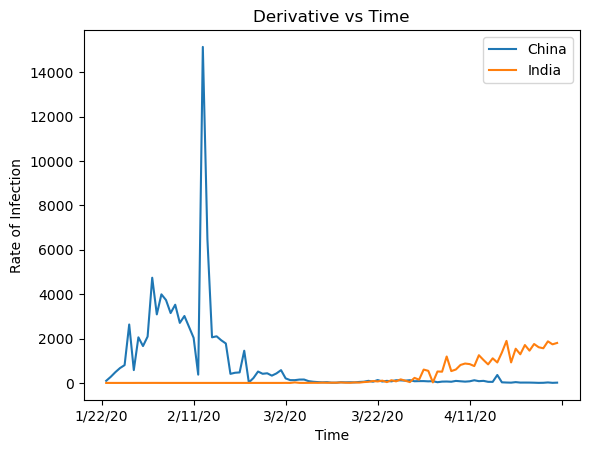

In [16]:
#calculate the first derivative of curve
corona_agg.loc["China"].diff().plot()
corona_agg.loc["India"].diff().plot()
plt.xlabel("Time")
plt.ylabel("Rate of Infection")
plt.legend()
plt.title("Derivative vs Time")

In [19]:
#calculating max infection rates for all countries and adding it to our dataset
countries = list(corona_agg.index)
max_infection_rate = []
for c in countries:
    max_infection_rate.append(corona_agg.loc[c].diff().max())
corona_agg["max_infection_rate"] = max_infection_rate
corona_agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [39]:
#creating a new dataframe 
corona_data = pd.DataFrame(corona_agg["max_infection_rate"])
corona_data

,max_infection_rate
Country,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [40]:
#importing the happiness report dataset
happ_df = pd.read_csv(r"worldwide_happiness_report.csv")
happ_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [46]:
#dropping the unnecessary columns
happ_df.drop(["Overall rank","Score","Generosity","Perceptions of corruption"], axis=1, inplace=True)

In [48]:
happ_df.set_index("Country or region", inplace=True)
happ_df.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [49]:
print("Corona_data: ",corona_data.shape)
print("Happ_df: ",happ_df.shape)

Corona_data:  (187, 1)
Happ_df:  (156, 4)


In [64]:
#joining the two dataframes by inner join
df = corona_data.join(happ_df, how="inner")
df

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [65]:
#finding the correlation between different values
df.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

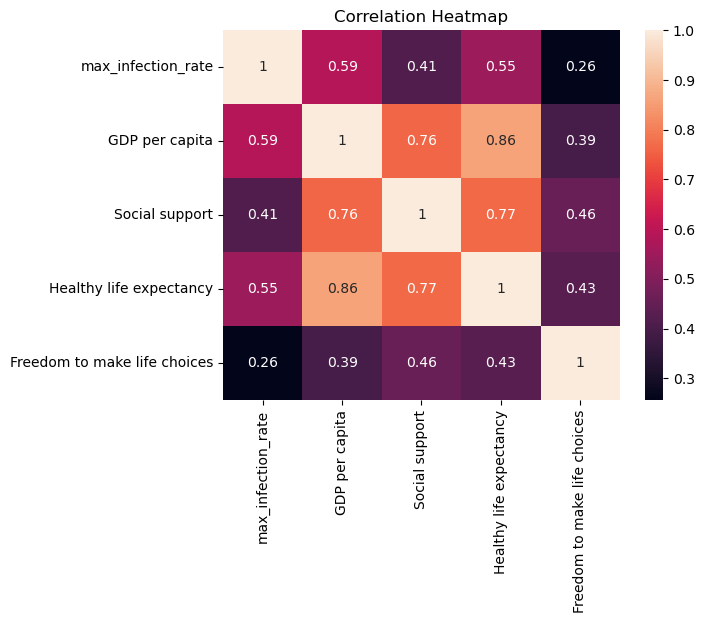

In [81]:
#visualising it using heatmap
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")

In [73]:
df["max_infection_rate"] = np.log(df["max_infection_rate"])

Text(0.5, 1.0, 'Linear Regression Model for GDP per capital vs max_infection_rate')

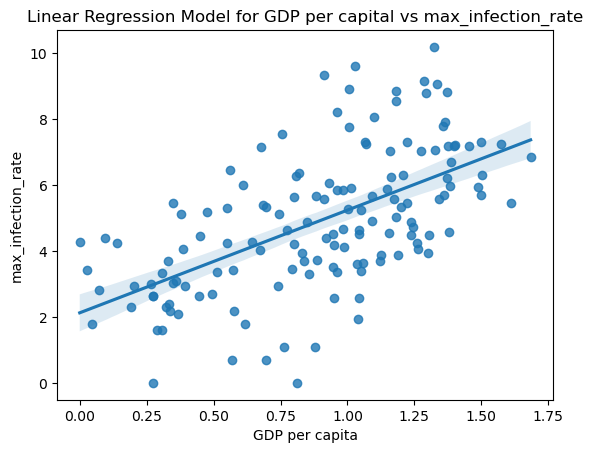

In [76]:
#plotting regression model for gdp per capita vs max_infection_rate
sns.regplot(x="GDP per capita", y="max_infection_rate", data=df)
plt.title("Linear Regression Model for GDP per capital vs Max Infection Rate")

Text(0.5, 1.0, 'Linear Regression Model for Social Support vs Max Infection Rate')

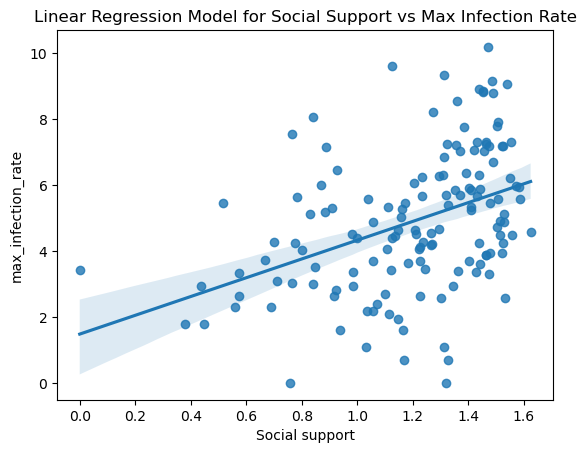

In [78]:
#plotting regression model for social support vs max_infection_rate
sns.regplot(x="Social support", y="max_infection_rate", data=df)
plt.title("Linear Regression Model for Social Support vs Max Infection Rate")

Text(0.5, 1.0, 'Linear Regression Model for Healthy Life Expectancy vs Max Infection Rate')

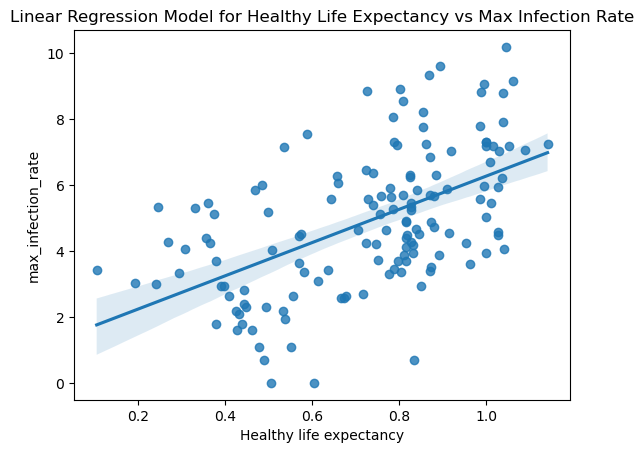

In [79]:
#plotting regression model for healthy life expectancy vs max_infection_rate
sns.regplot(x="Healthy life expectancy", y="max_infection_rate", data=df)
plt.title("Linear Regression Model for Healthy Life Expectancy vs Max Infection Rate")

Text(0.5, 1.0, 'Linear Regression Model for Freedom to make Life Choices vs Max Infection Rate')

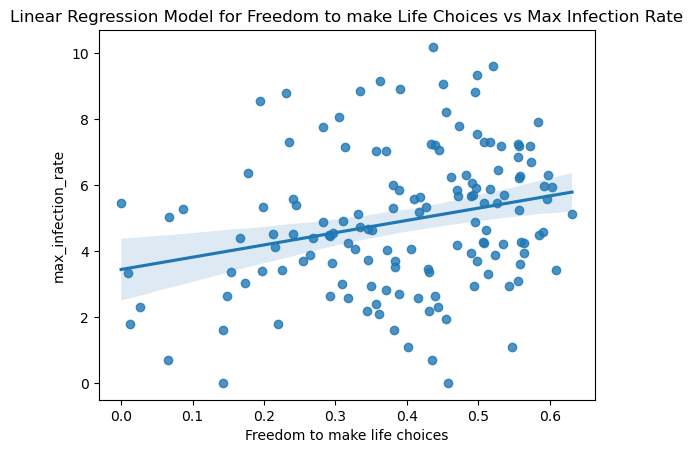

In [80]:
#plotting regression model for freedom to make life choices vs max_infection_rate
sns.regplot(x="Freedom to make life choices", y="max_infection_rate", data=df)
plt.title("Linear Regression Model for Freedom to make Life Choices vs Max Infection Rate")

#### We see that there is a positive correlation between the Maximum Infection Rates and other properties, anmely: GDP per Capita,	Social Support,	Healthy Life Expectancy, and Freedom to Make Life Choices.